In [1]:
import logging
logger = logging.getLogger()
logger.setLevel(logging.DEBUG)
logging.debug("Logging")

DEBUG:root:Logging


In [2]:
import logikon

DEBUG:matplotlib:matplotlib data path: /Users/gregorbetz/git/logikon2/.direnv/logikon/lib/python3.11/site-packages/matplotlib/mpl-data
DEBUG:matplotlib:CONFIGDIR=/Users/gregorbetz/.matplotlib
DEBUG:matplotlib:interactive is False
DEBUG:matplotlib:platform is darwin
DEBUG:matplotlib:CACHEDIR=/Users/gregorbetz/.matplotlib
DEBUG:matplotlib.font_manager:Using fontManager instance from /Users/gregorbetz/.matplotlib/fontlist-v330.json
DEBUG:graphviz._tools:deprecate positional args: graphviz.backend.piping.pipe(['renderer', 'formatter', 'neato_no_op', 'quiet'])
DEBUG:graphviz._tools:deprecate positional args: graphviz.backend.rendering.render(['renderer', 'formatter', 'neato_no_op', 'quiet'])
DEBUG:graphviz._tools:deprecate positional args: graphviz.backend.unflattening.unflatten(['stagger', 'fanout', 'chain', 'encoding'])
DEBUG:graphviz._tools:deprecate positional args: graphviz.backend.viewing.view(['quiet'])
DEBUG:graphviz._tools:deprecate positional args: graphviz.quoting.quote(['is_html

In [3]:
import os

import dotenv

dotenv.load_dotenv("../.env")
"HUGGINGFACEHUB_API_TOKEN" in os.environ or print("Please set HUGGINGFACEHUB_API_TOKEN in .env")

True

In [4]:
classifier_url = "https://api-inference.huggingface.co/models/MoritzLaurer/DeBERTa-v3-base-mnli-fever-anli"
classifier_url = os.environ.get("CLASSIFIER_URL", classifier_url)  # use custom inference endpoint if set

config = logikon.ScoreConfig(
    artifacts=["svg_argmap"],
    global_kwargs={
        "expert_model": "meta-llama/Meta-Llama-3-70B-Instruct",
        "inference_server_url": "https://api-inference.huggingface.co/models/meta-llama/Meta-Llama-3-70B-Instruct",
        "llm_backend": "HFChat",
        "api_key": os.environ["HUGGINGFACEHUB_API_TOKEN"],
        "classifier_kwargs": {
            "model_id": "MoritzLaurer/DeBERTa-v3-base-mnli-fever-anli",
            "inference_server_url": classifier_url,
            "api_key": os.environ.get("HUGGINGFACEHUB_API_TOKEN"),
            "batch_size": 8,
        },
    }
)

In [5]:
import time 
start_time = time.time()
prompt = "Should we use nuclear energy?"
completion = (
    "Yes, we should use nuclear energy because it is a clean and efficient source of power "
    "that can help reduce our dependence on fossil fuels. Nuclear power plants produce "
    "electricity without emitting greenhouse gases, which can help combat climate change. "
    "Additionally, nuclear energy is a reliable source of power that can provide electricity "
    "to millions of people around the world.\n"
    "Against nuclear energy, some people argue that it is unsafe and poses risks to the environment. "
    "They refer, in particular, to the possibility of accidents or the disposal of radioactive waste. "
    "Yet these risks can be managed through proper regulation and safety measures.\n"
    "Overall, nuclear "
    "energy is a valuable source of power that can help meet our energy needs while protecting "
    "the environment."
)
res = await logikon.ascore(prompt=prompt, completion=completion, config=config)
print(f"Time: {time.time() - start_time}")

DEBUG:httpx:load_ssl_context verify=True cert=None trust_env=True http2=False
DEBUG:httpx:load_verify_locations cafile='/Users/gregorbetz/git/logikon2/.direnv/logikon/lib/python3.11/site-packages/certifi/cacert.pem'
DEBUG:httpx:load_ssl_context verify=True cert=None trust_env=True http2=False
DEBUG:httpx:load_verify_locations cafile='/Users/gregorbetz/git/logikon2/.direnv/logikon/lib/python3.11/site-packages/certifi/cacert.pem'
INFO:logikon.backends.chat_models_with_grammar:Created logits model: client=<openai.resources.chat.completions.Completions object at 0x11f7fe510> async_client=<openai.resources.chat.completions.AsyncCompletions object at 0x1390a7110> model_name='accounts/fireworks/models/nous-hermes-2-mixtral-8x7b-dpo-fp8' openai_api_key=SecretStr('**********') openai_api_base='https://api.fireworks.ai/inference/v1' openai_proxy=''
DEBUG:httpx:load_ssl_context verify=True cert=None trust_env=True http2=False
DEBUG:httpx:load_verify_locations cafile='/Users/gregorbetz/git/logikon

/opt/homebrew/bin/dot


DEBUG:httpcore.http11:receive_response_headers.complete return_value=(b'HTTP/1.1', 200, b'OK', [(b'Date', b'Tue, 07 May 2024 09:18:53 GMT'), (b'Content-Type', b'application/json'), (b'Transfer-Encoding', b'chunked'), (b'Connection', b'keep-alive'), (b'CF-Ray', b'8800200e2ebd5d84-FRA'), (b'CF-Cache-Status', b'DYNAMIC'), (b'Access-Control-Allow-Origin', b'*'), (b'Via', b'1.1 google'), (b'fireworks-server-processing-time', b'0.212'), (b'x-request-id', b'4b4bc2fe-9cc4-45ab-bc45-f36fa83f84b4'), (b'Vary', b'Accept-Encoding'), (b'Server', b'cloudflare'), (b'Content-Encoding', b'gzip')])
INFO:httpx:HTTP Request: POST https://api.fireworks.ai/inference/v1/chat/completions "HTTP/1.1 200 OK"
DEBUG:httpcore.http11:receive_response_body.started request=<Request [b'POST']>
DEBUG:httpcore.http11:receive_response_body.complete
DEBUG:httpcore.http11:response_closed.started
DEBUG:httpcore.http11:response_closed.complete
DEBUG:openai._base_client:HTTP Request: POST https://api.fireworks.ai/inference/v1/c

Time: 18.64814829826355


In [6]:
res

{'argmap_size': Score(id='argmap_size', description='Measure the size of the argument map (number of nodes)', metadata=None, value=10.0, comment=''),
 'global_balance': Score(id='global_balance', description="The argument map's global balance (assumes mutually exclusive and collectively exhaustive root claims)", metadata=None, value=0.3822264855802984, comment=''),
 'n_root_nodes': Score(id='n_root_nodes', description='Cont the number of root nodes in argument map (out degree = 0)', metadata=None, value=2.0, comment=''),
 'issue': Artifact(id='issue', description='Issue or decision problem addressed in the deliberation', metadata=None, data='Should we use nuclear energy?', dtype=None),
 'proscons': Artifact(id='proscons', description='Pros and cons list with multiple root claims', metadata={'reasons_list': [Claim(text="Nuclear energy is a clean and efficient power source that reduces dependence on fossil fuels and doesn't emit greenhouse gases.", label='Clean and efficient power'), Cla

DEBUG:httpcore.connection:close.started
DEBUG:httpcore.connection:close.complete
DEBUG:httpcore.connection:close.started
DEBUG:httpcore.connection:close.complete
DEBUG:httpcore.connection:close.started
DEBUG:httpcore.connection:close.complete
DEBUG:httpcore.connection:close.started
DEBUG:httpcore.connection:close.complete
DEBUG:httpcore.connection:close.started
DEBUG:httpcore.connection:close.complete
DEBUG:httpcore.connection:close.started
DEBUG:httpcore.connection:close.complete
DEBUG:httpcore.connection:close.started
DEBUG:httpcore.connection:close.complete
DEBUG:httpcore.connection:close.started
DEBUG:httpcore.connection:close.complete
DEBUG:httpcore.connection:close.started
DEBUG:httpcore.connection:close.complete


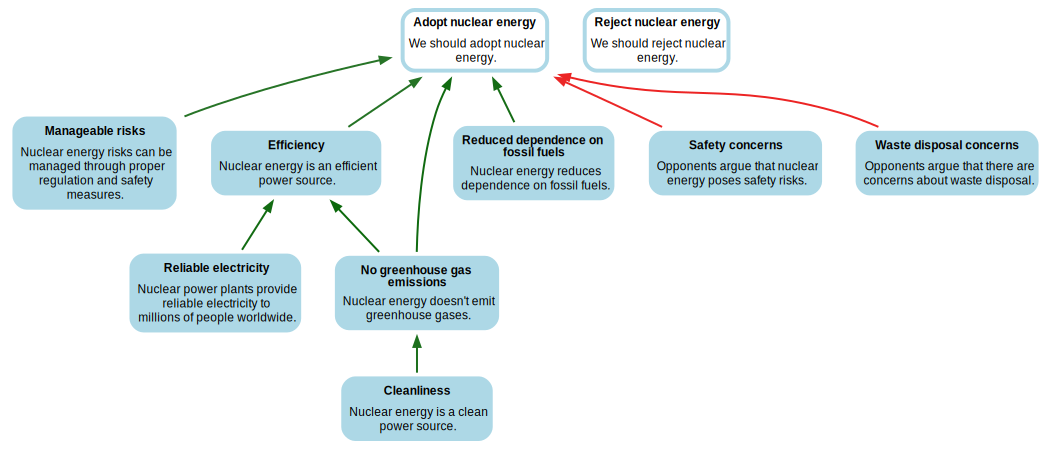

In [7]:
from IPython.display import SVG

SVG(res.get_artifact("svg_argmap").data)

In [8]:
import networkx as nx
G = res.get_artifact("fuzzy_argmap_nx").data
nx.node_link_data(G)

{'directed': True,
 'multigraph': False,
 'graph': {},
 'nodes': [{'text': 'We should adopt nuclear energy.',
   'label': 'Adopt nuclear energy',
   'annotations': [],
   'node_type': 'central_claim',
   'id': '74bd754e-f602-4010-b369-24388fb19e91'},
  {'text': 'Nuclear power plants provide reliable electricity to millions of people worldwide.',
   'label': 'Reliable electricity',
   'annotations': [],
   'node_type': 'reason',
   'id': 'daa409d8-63cc-485f-88bf-611d22485e28'},
  {'text': 'Nuclear energy risks can be managed through proper regulation and safety measures.',
   'label': 'Manageable risks',
   'annotations': [],
   'node_type': 'reason',
   'id': '39ad411a-2480-46c1-a26e-495d8d8ad499'},
  {'text': 'Nuclear energy is a clean power source.',
   'label': 'Cleanliness',
   'annotations': [],
   'node_type': 'reason',
   'id': '9e282146-240d-4be0-8bdc-e79bba06d10f'},
  {'text': 'Nuclear energy is an efficient power source.',
   'label': 'Efficiency',
   'annotations': [],
   'n

In [9]:
G.out_degree('1296d89c-1e31-4a51-a222-14f22ead175a')

OutDegreeView({})